<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка" data-toc-modified-id="Подготовка-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка</a></span><ul class="toc-item"><li><span><a href="#Загрузка-библиотек" data-toc-modified-id="Загрузка-библиотек-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Загрузка библиотек</a></span></li><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Загрузка данных</a></span><ul class="toc-item"><li><span><a href="#Создадим-признаки-для-горизонта-прогнозирования-в-один-шаг" data-toc-modified-id="Создадим-признаки-для-горизонта-прогнозирования-в-один-шаг-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Создадим признаки для горизонта прогнозирования в один шаг</a></span></li></ul></li></ul></li><li><span><a href="#Анализ" data-toc-modified-id="Анализ-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ</a></span></li><li><span><a href="#Обучение" data-toc-modified-id="Обучение-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Обучение</a></span><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Обучение-моделей" data-toc-modified-id="Обучение-моделей-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Обучение моделей</a></span><ul class="toc-item"><li><span><a href="#LinearRegression" data-toc-modified-id="LinearRegression-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>LinearRegression</a></span></li><li><span><a href="#RandomForestRegressor" data-toc-modified-id="RandomForestRegressor-3.2.2"><span class="toc-item-num">3.2.2&nbsp;&nbsp;</span>RandomForestRegressor</a></span></li><li><span><a href="#LightGBM" data-toc-modified-id="LightGBM-3.2.3"><span class="toc-item-num">3.2.3&nbsp;&nbsp;</span>LightGBM</a></span></li><li><span><a href="#XGBoost" data-toc-modified-id="XGBoost-3.2.4"><span class="toc-item-num">3.2.4&nbsp;&nbsp;</span>XGBoost</a></span></li><li><span><a href="#CatBoost" data-toc-modified-id="CatBoost-3.2.5"><span class="toc-item-num">3.2.5&nbsp;&nbsp;</span>CatBoost</a></span></li></ul></li></ul></li><li><span><a href="#Тестирование" data-toc-modified-id="Тестирование-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование</a></span><ul class="toc-item"><li><span><a href="#Адекватность-модели" data-toc-modified-id="Адекватность-модели-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Адекватность модели</a></span></li><li><span><a href="#LinearRegression" data-toc-modified-id="LinearRegression-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>LinearRegression</a></span></li><li><span><a href="#RandomForestRegressor" data-toc-modified-id="RandomForestRegressor-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>RandomForestRegressor</a></span></li><li><span><a href="#LGBMRegressor" data-toc-modified-id="LGBMRegressor-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>LGBMRegressor</a></span></li><li><span><a href="#XGBRegressor" data-toc-modified-id="XGBRegressor-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>XGBRegressor</a></span></li><li><span><a href="#CatBoostRegressor" data-toc-modified-id="CatBoostRegressor-4.6"><span class="toc-item-num">4.6&nbsp;&nbsp;</span>CatBoostRegressor</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

#  Прогнозирование заказов такси

Компания «Чётенькое такси» собрала исторические данные о заказах такси в аэропортах. Чтобы привлекать больше водителей в период пиковой нагрузки, нужно спрогнозировать количество заказов такси на следующий час. Постройте модель для такого предсказания.

Значение метрики *RMSE* на тестовой выборке должно быть не больше 48.

Вам нужно:

1. Загрузить данные и выполнить их ресемплирование по одному часу.
2. Проанализировать данные.
3. Обучить разные модели с различными гиперпараметрами. Сделать тестовую выборку размером 10% от исходных данных.
4. Проверить данные на тестовой выборке и сделать выводы.


Данные лежат в файле `taxi.csv`. Количество заказов находится в столбце `num_orders` (от англ. *number of orders*, «число заказов»).

## Подготовка

### Загрузка библиотек

In [1]:
pip install category_encoders

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics import tsaplots
from matplotlib.collections import PolyCollection
import numpy as np
import random
import sklearn
from pprint import pprint
from datetime import datetime

import lightgbm as lgb
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import train_test_split, RandomizedSearchCV, TimeSeriesSplit
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from statsmodels.tsa.seasonal import seasonal_decompose

### Загрузка данных

In [3]:
try:
    data = pd.read_csv('/datasets/taxi.csv', 
                       index_col=[0], parse_dates=[0])
except:
    data = pd.read_csv("https://code.s3.yandex.net/datasets/taxi.csv", 
                       index_col=[0], parse_dates=[0])

In [4]:
data.sort_index(inplace=True)
data = data.resample('1h').sum()

In [5]:
data.head()

,num_orders
datetime,
2018-03-01 00:00:00,124
2018-03-01 01:00:00,85
2018-03-01 02:00:00,71
2018-03-01 03:00:00,66
2018-03-01 04:00:00,43


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4416 entries, 2018-03-01 00:00:00 to 2018-08-31 23:00:00
Freq: H
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   num_orders  4416 non-null   int64
dtypes: int64(1)
memory usage: 69.0 KB


In [7]:
data.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
num_orders,4416.0,84.422781,45.023853,0.0,54.0,78.0,107.0,462.0


In [8]:
print(f"""Данные представлены за период: {data.index[0]} - {data.index[-1]}.
За {data.index[-1].month-data.index[0].month + 1} месяцев
Всего часов за этот промежуток: {int((pd.to_datetime(data.index[-1]) - pd.to_datetime(data.index[0]))/ np.timedelta64(1, 'h') + 1)}
Количество часов в данных: {data.shape[0]}""")

Данные представлены за период: 2018-03-01 00:00:00 - 2018-08-31 23:00:00.
За 6 месяцев
Всего часов за этот промежуток: 4416
Количество часов в данных: 4416


Пропусков во временном ряду нет

Посмотрим на распределение целевого признака

In [9]:
sns.set(style='darkgrid')

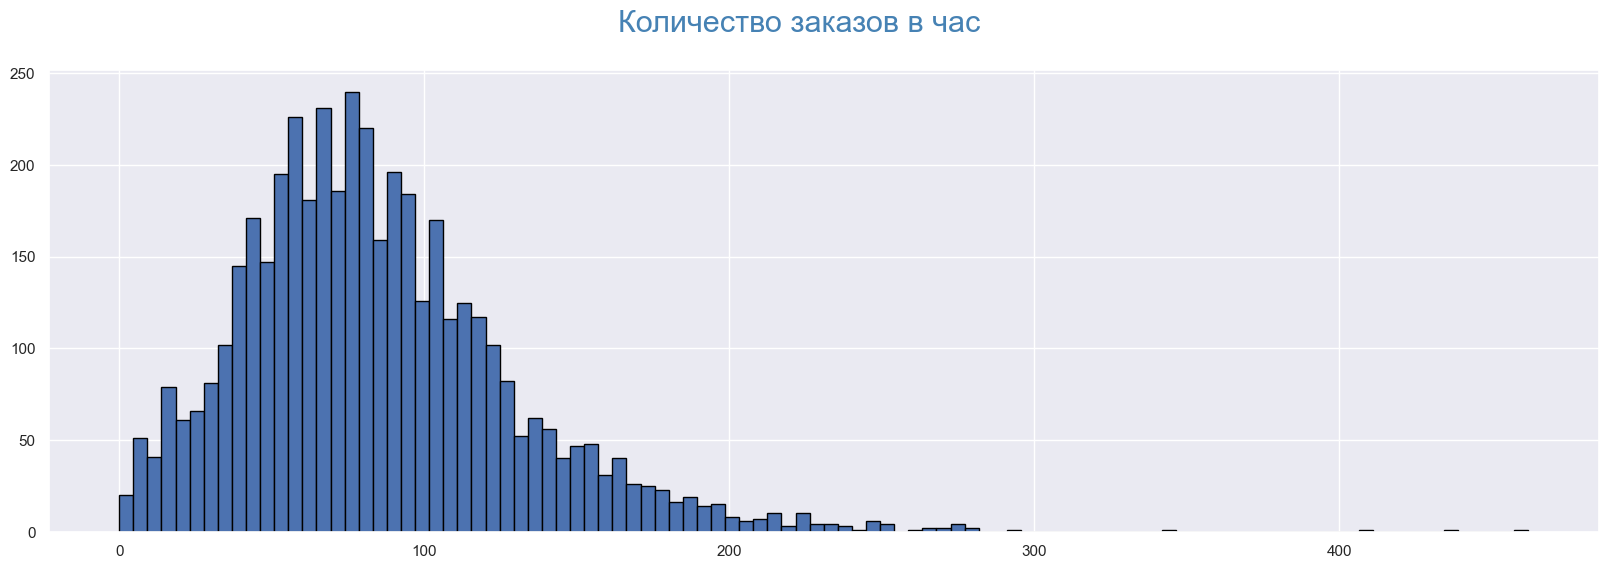

In [10]:
data['num_orders'].hist(figsize=(20,6), edgecolor='black', bins=100)
plt.suptitle('Количество заказов в час', fontsize = 22, color = 'SteelBlue')
plt.show()

Пропусков в данных нет, выбросы не обрабатываем

In [11]:
data[data['num_orders'] > 250].sort_values(by=['num_orders'], ascending=False)

,num_orders
datetime,
2018-08-20 02:00:00,462
2018-08-13 02:00:00,437
2018-08-27 02:00:00,408
2018-08-30 17:00:00,342
2018-08-27 04:00:00,295
2018-08-26 00:00:00,281
2018-08-18 00:00:00,281
2018-08-31 00:00:00,276
2018-08-13 01:00:00,273


Большая часть выбросов - ночь. Это могут быть ночные рейсы самолётов/поездов

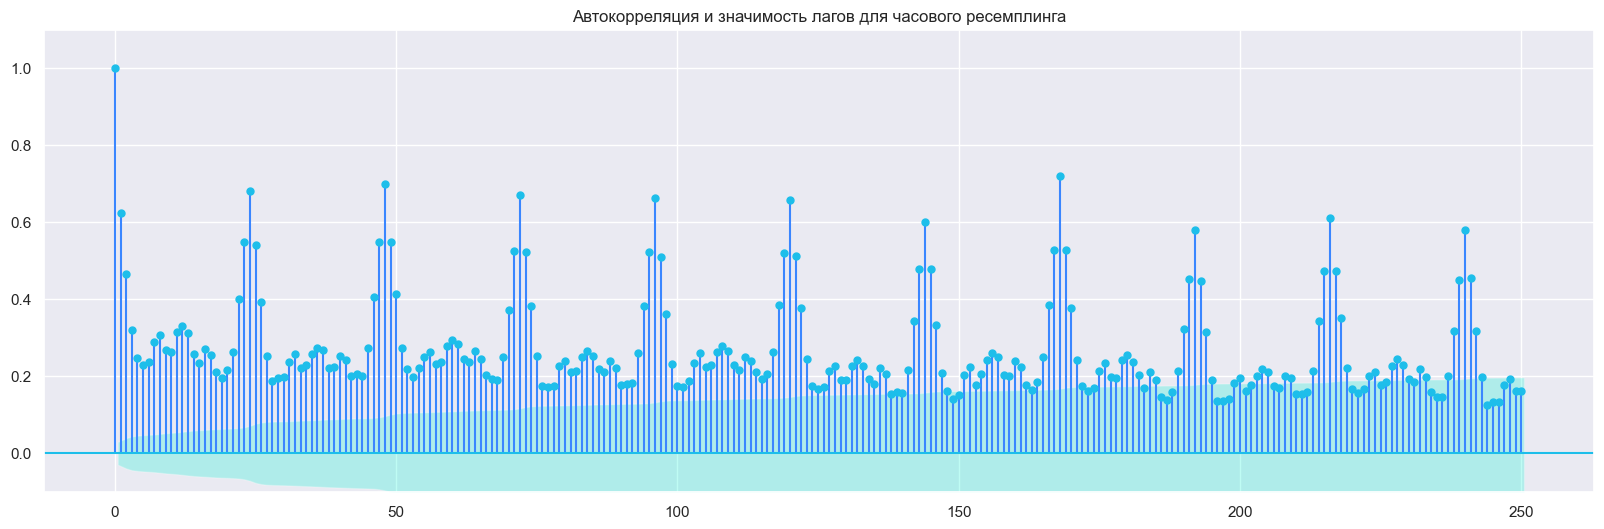

In [12]:
curr_fig, curr_ax = plt.subplots(figsize=(20, 6))
tsaplots.plot_acf(data['num_orders'], lags=250, ax=curr_ax, color='#1DBEEA', 
                  title='Автокорреляция и значимость лагов для часового ресемплинга', vlines_kwargs={"colors": '#3A86FF'})
for item in curr_ax.collections:
    if type(item)==PolyCollection:
        item.set_facecolor('#00F5D4')
plt.ylim(-.1, 1.1)
plt.show() 

Из графика видна сезонность в 24 лага, после 150 лагов статистическая значимость становится незначительной  
У насприсутствует дневная сезоннасть. Также необходимо сделать дополнительный ресемплинг 1 день чтобы посмотреть на недельную сезонность  

In [13]:
data_1d = data.resample('1D').sum()

In [14]:
data_1d.info

<bound method DataFrame.info of             num_orders
datetime              
2018-03-01        1364
2018-03-02        1506
2018-03-03        1290
2018-03-04        1141
2018-03-05        1259
...                ...
2018-08-27        3936
2018-08-28        3357
2018-08-29        3762
2018-08-30        4090
2018-08-31        4018

[184 rows x 1 columns]>

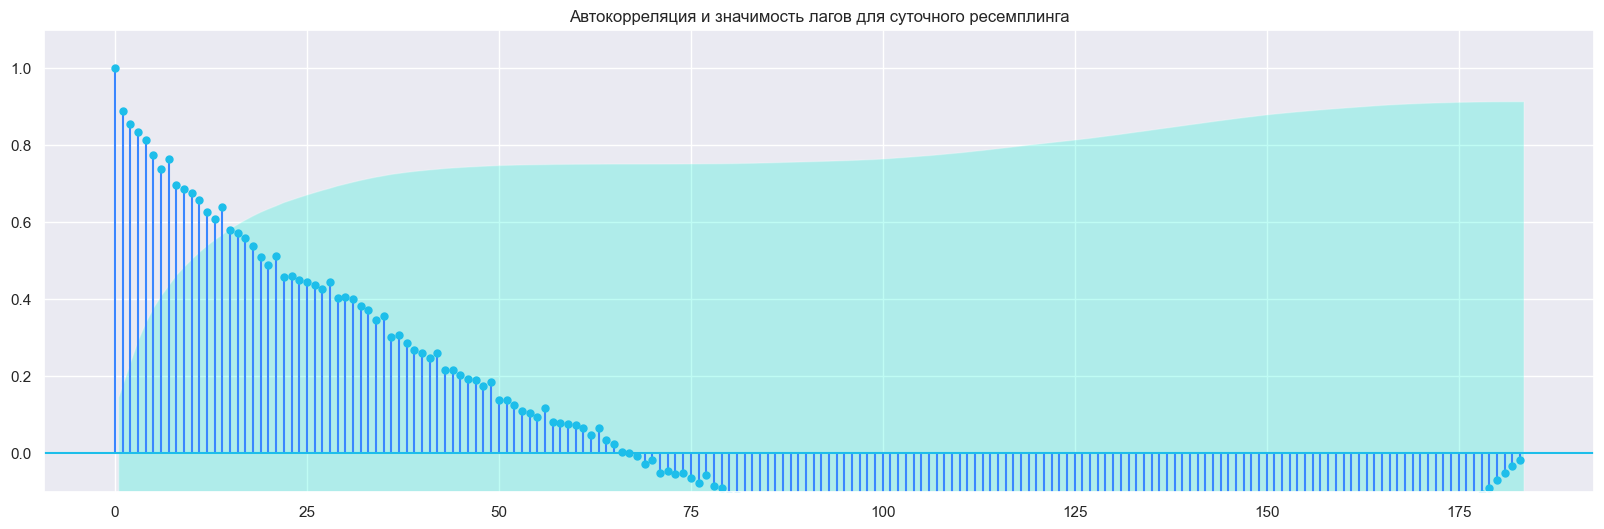

In [15]:
curr_fig, curr_ax = plt.subplots(figsize=(20, 6))
tsaplots.plot_acf(data_1d['num_orders'], lags=data_1d.shape[0]-1, ax=curr_ax, color='#1DBEEA', 
                  title='Автокорреляция и значимость лагов для суточного ресемплинга', vlines_kwargs={"colors": '#3A86FF'})
for item in curr_ax.collections:
    if type(item)==PolyCollection:
        item.set_facecolor('#00F5D4')
plt.ylim(-.1, 1.1)
plt.show() 

Сезонность не наблюдается, статистическая значимость в районе 15 дней

Разложим временной ряд на тренд, сезонность и остаток для обоих датасетов

In [16]:
decomposed_1h = seasonal_decompose(data)

In [17]:
decomposed_1d = seasonal_decompose(data_1d)

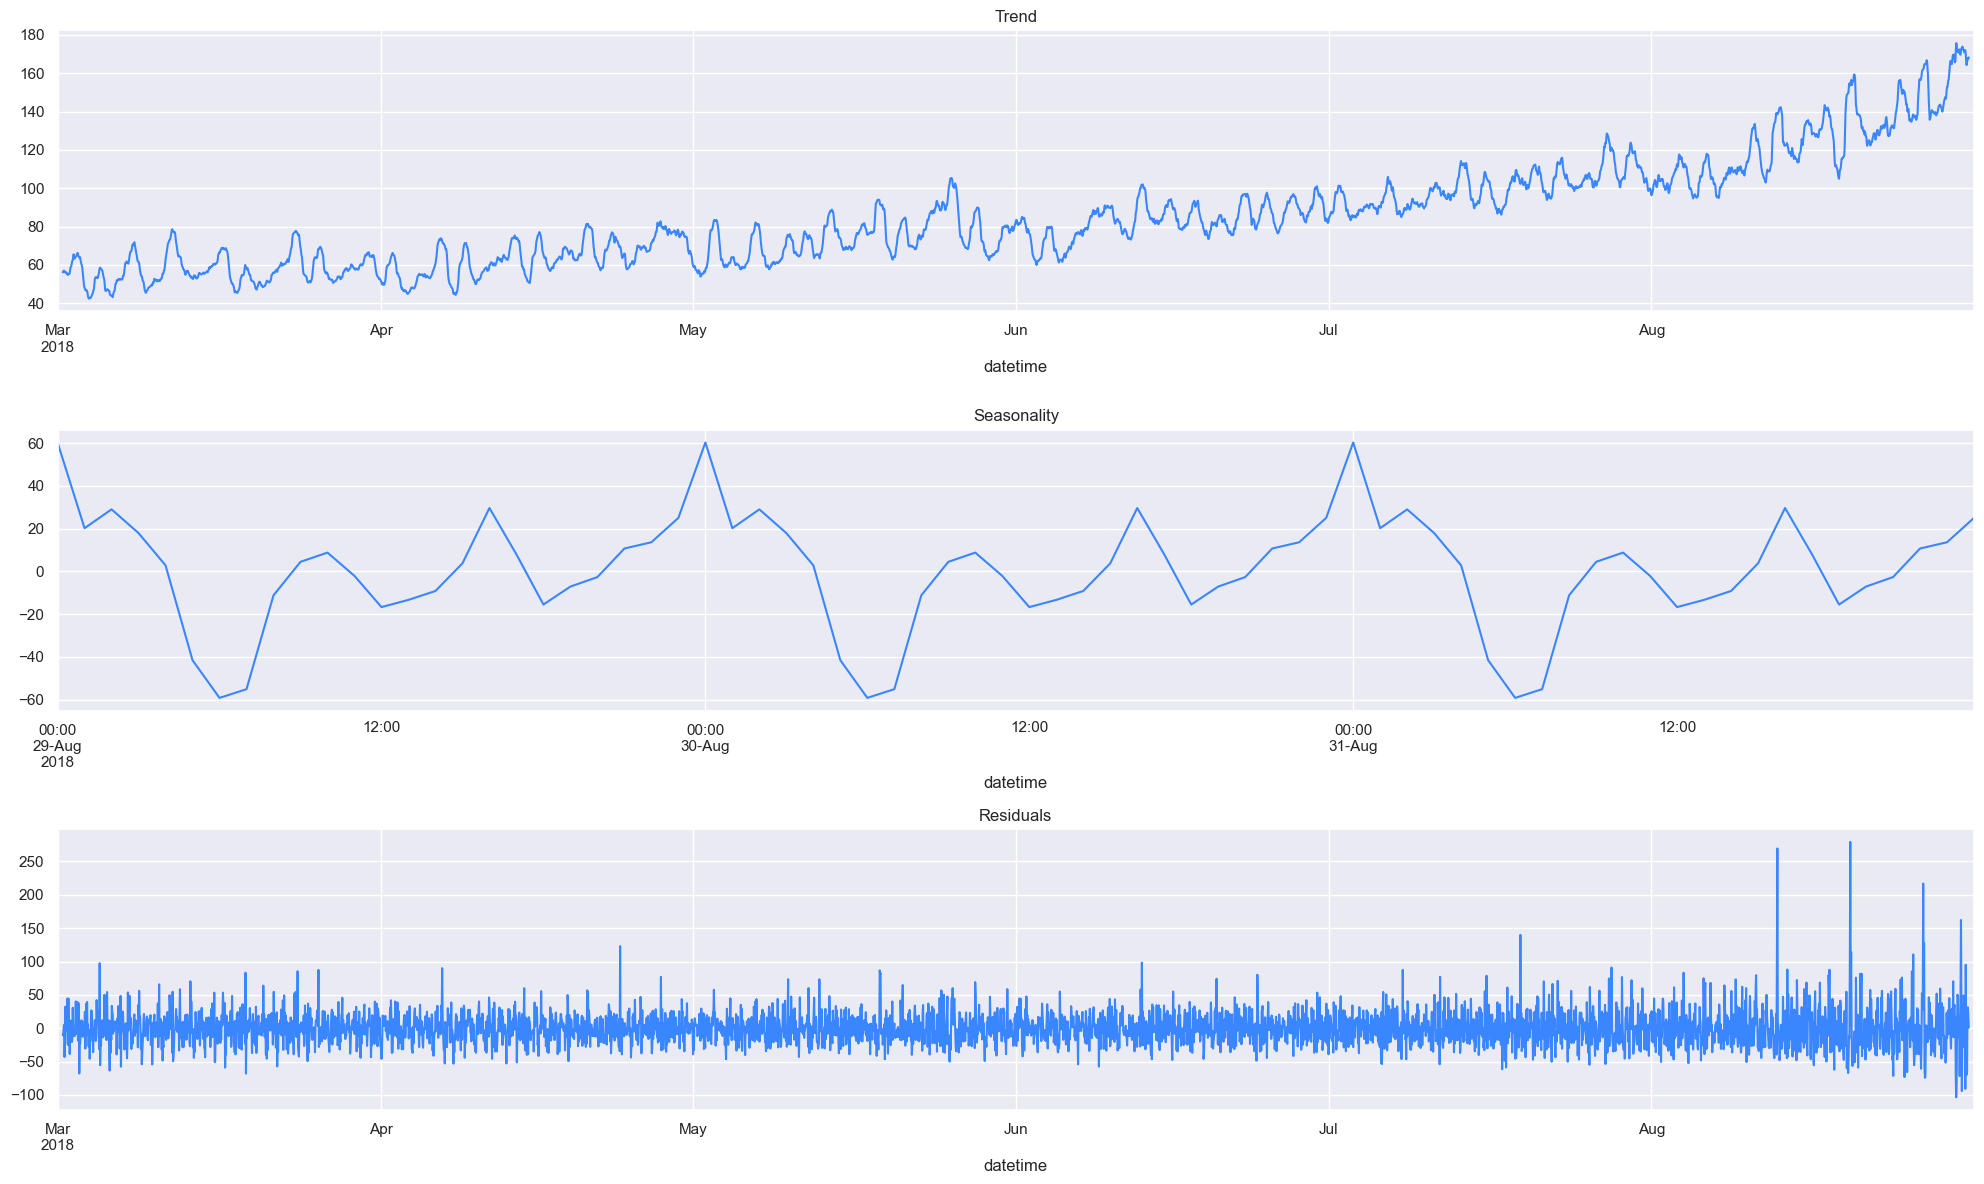

In [18]:
plt.figure(figsize=(20, 12))
plt.subplot(311)
decomposed_1h.trend.plot(ax=plt.gca(), grid=True, color='#3A86FF')
plt.title('Trend')
plt.subplot(312)
decomposed_1h.seasonal.tail(72).plot(ax=plt.gca(), color='#3A86FF')
plt.title('Seasonality')
plt.subplot(313)
decomposed_1h.resid.plot(ax=plt.gca(), grid=True, color='#3A86FF')
plt.title('Residuals')
plt.tight_layout()

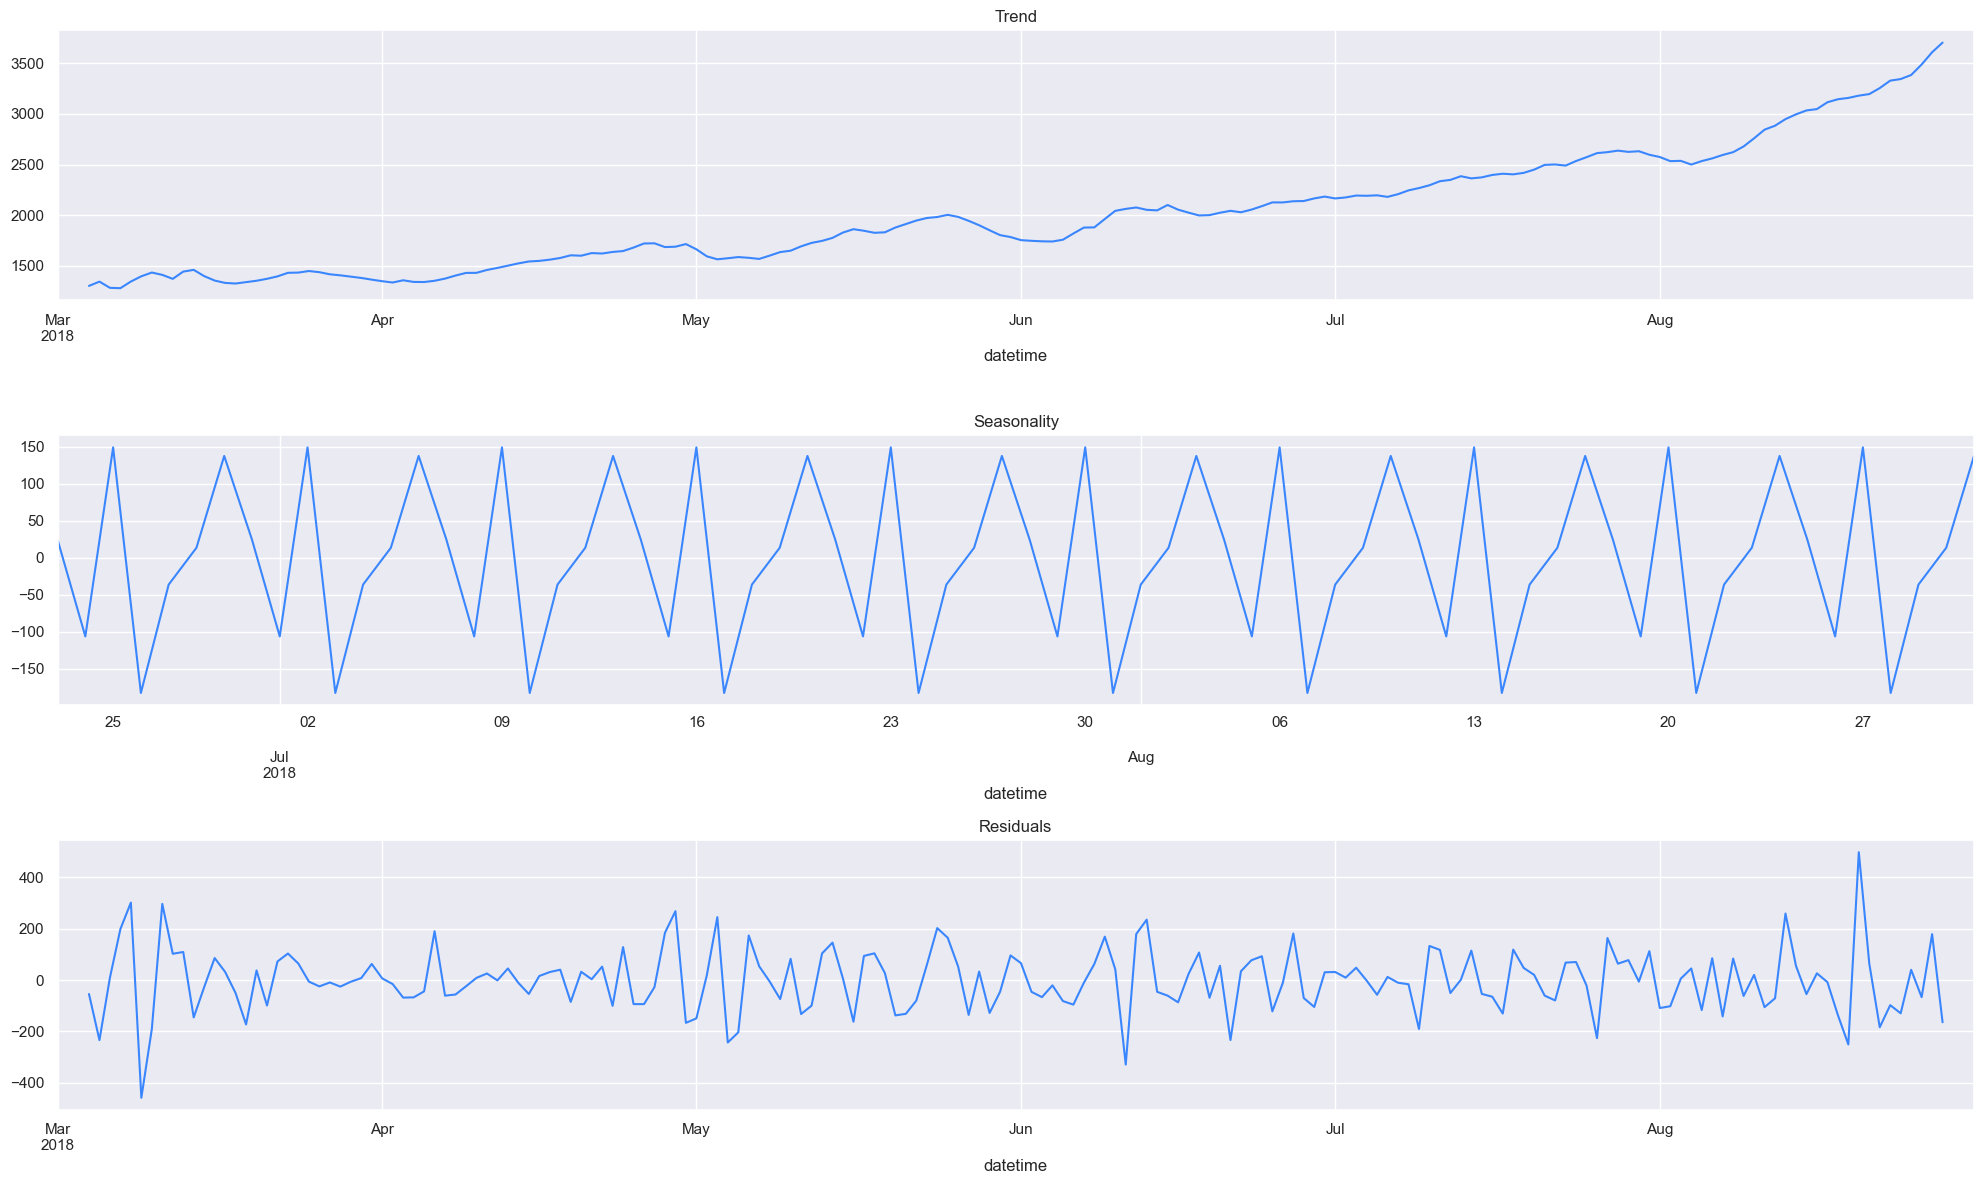

In [19]:
plt.figure(figsize=(20, 12))
plt.subplot(311)
decomposed_1d.trend.plot(ax=plt.gca(), grid=True, color='#3A86FF')
plt.title('Trend')
plt.subplot(312)
decomposed_1d.seasonal.tail(70).plot(ax=plt.gca(), grid=True, color='#3A86FF')
plt.title('Seasonality')
plt.subplot(313)
decomposed_1d.resid.plot(ax=plt.gca(), grid=True, color='#3A86FF')
plt.title('Residuals')
plt.tight_layout()

Видим, что к лету тренд возрастает - душное метро или машина с кондиционером? :)  
У часового семплинга сезонность - 1 день, у дневного семплинга - 1 неделя

Посмотрим на суточную сезонность

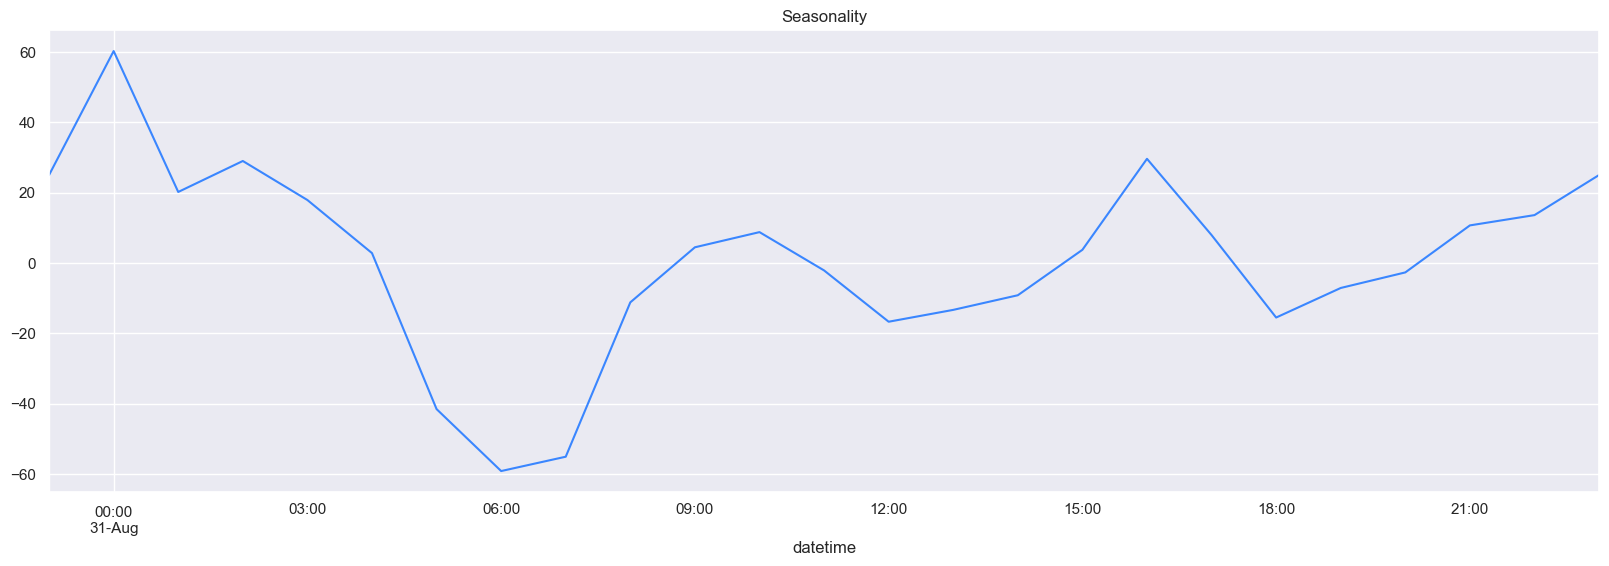

In [20]:
plt.figure(figsize=(20, 6))

decomposed_1h.seasonal.tail(25).plot(ax=plt.gca(), color='#3A86FF')
plt.title('Seasonality');

Из суточной сезонности видно, что пик приходится на полночь, а минимум на 6 утра

Посмотрим на недельную сезонность

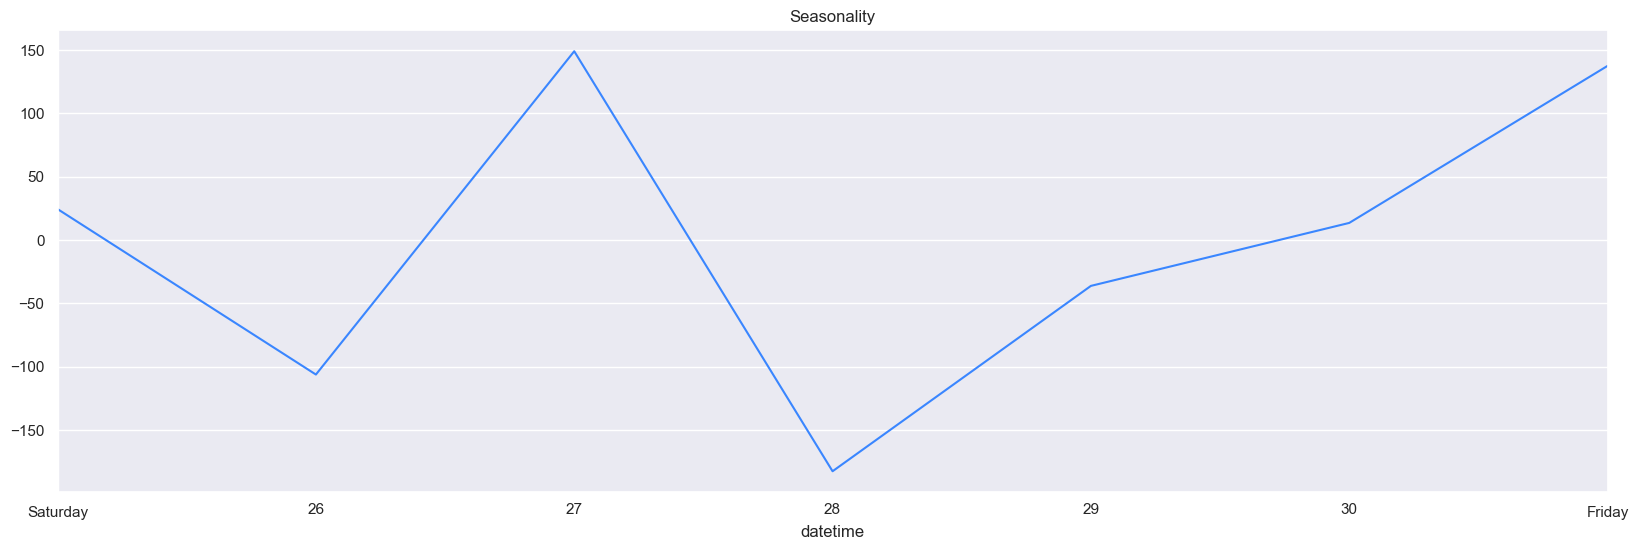

In [21]:
plt.figure(figsize=(20, 6))

d_of_week = data_1d.tail(7).index.day_name().to_list()
ax = decomposed_1d.seasonal.tail(7).plot(ax=plt.gca(), color='#3A86FF')
current_labels = ax.get_xticks().tolist()
ax.set_xticks(current_labels)
ax.set_xticklabels([d_of_week[0], d_of_week[-1]])
plt.title('Seasonality');
plt.show()

Из недельной сезонности видно, что пик приходится на понедельник, а минимум на вторник

Для двух датасетов добавим признаки:  
- датасет с часовым ресемпленгом:
  - количество лагов равным недели 168 (24 * 7)  
  - скользящее среднее на 3 дня  


- датасет с дневным ресемпленгом  
  - количество лагов равным 5 неделям
  - скользящее среднее на 1 неделю

**ВЫВОД**:  

- Суточная сезонность присутствует, что пик приходится на полночь, а минимум на 6 утра. В датасет добавим признак часа  
- Недельная сезонность то видна, пик приходится на понедельник, а минимум на вторник. В основной датафрейм также стоит добавить признак дня недели
- В конце датасате остатков становится больше - ожидаем ухудшения качества модели при тестировании

#### Создадим признаки для горизонта прогнозирования в один шаг

In [22]:
def make_features(df, max_lag, rolling_mean_size):
    df['hour'] = df.index.hour
    df['dayofweek'] = df.index.dayofweek
    
    for lag in range(1, max_lag + 1):
        df['lag_{}'.format(lag)] = df['num_orders'].shift(lag)
    
    df['rolling_mean'] = df['num_orders'].shift().rolling(rolling_mean_size).mean()

make_features(data, 168, 72)
make_features(data_1d, 35, 7)

C:\Users\user\AppData\Local\Temp\ipykernel_28840\791352037.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['lag_{}'.format(lag)] = df['num_orders'].shift(lag)
C:\Users\user\AppData\Local\Temp\ipykernel_28840\791352037.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['lag_{}'.format(lag)] = df['num_orders'].shift(lag)
C:\Users\user\AppData\Local\Temp\ipykernel_28840\791352037.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor perf

In [23]:
data.head()

,num_orders,hour,dayofweek,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,...,lag_160,lag_161,lag_162,lag_163,lag_164,lag_165,lag_166,lag_167,lag_168,rolling_mean
datetime,,,,,,,,,,,,,,,,,,,,,
2018-03-01 00:00:00,124,0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-01 01:00:00,85,1,3,124.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-01 02:00:00,71,2,3,85.0,124.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-01 03:00:00,66,3,3,71.0,85.0,124.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-01 04:00:00,43,4,3,66.0,71.0,85.0,124.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


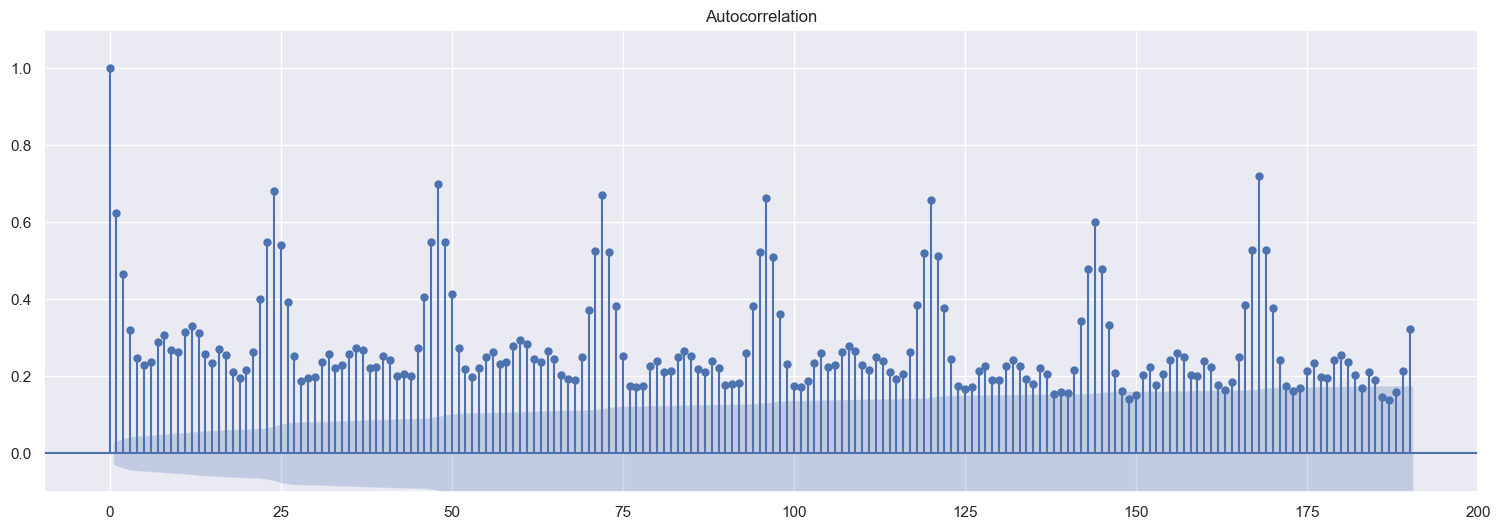

In [24]:

# Код ревьюера
from statsmodels.graphics import tsaplots

try:
    taxi = pd.read_csv("/datasets/taxi.csv", index_col=[0], parse_dates=[0]).resample('1H').sum()
except:
    taxi = pd.read_csv("https://code.s3.yandex.net/datasets/taxi.csv", 
                       index_col=[0], parse_dates=[0]).resample('1H').sum()


ts = taxi['num_orders']

fig = tsaplots.plot_acf(ts,lags= 190)
fig.set_size_inches(18.5, 6)
plt.ylim(-.1, 1.1)
plt.show() 


**ВЫВОД**:  

- Данные представлены за пол года - с марта по август включительно
- Добавили 168 отстающих признаков, скользящее среднее, признак дня недели и признак часа

## Обучение

### Подготовка данных

Разобъем выборку на обучающую и тестовую

In [25]:
train, test = train_test_split(data, shuffle=False, test_size=0.1)
train = train.dropna()

In [26]:
X_train = train.drop(["num_orders"], axis=1)
y_train = train["num_orders"]
X_test = test.drop(["num_orders"], axis=1)
y_test = test["num_orders"]

In [27]:
print(f"""Посмотрим на размеры наших выбороу
{X_train.shape} {X_test.shape}
{y_train.shape} {y_test.shape}""")

Посмотрим на размеры наших выбороу
(3806, 171) (442, 171)
(3806,) (442,)


<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

👍 Здесь все корректно.
</div> 

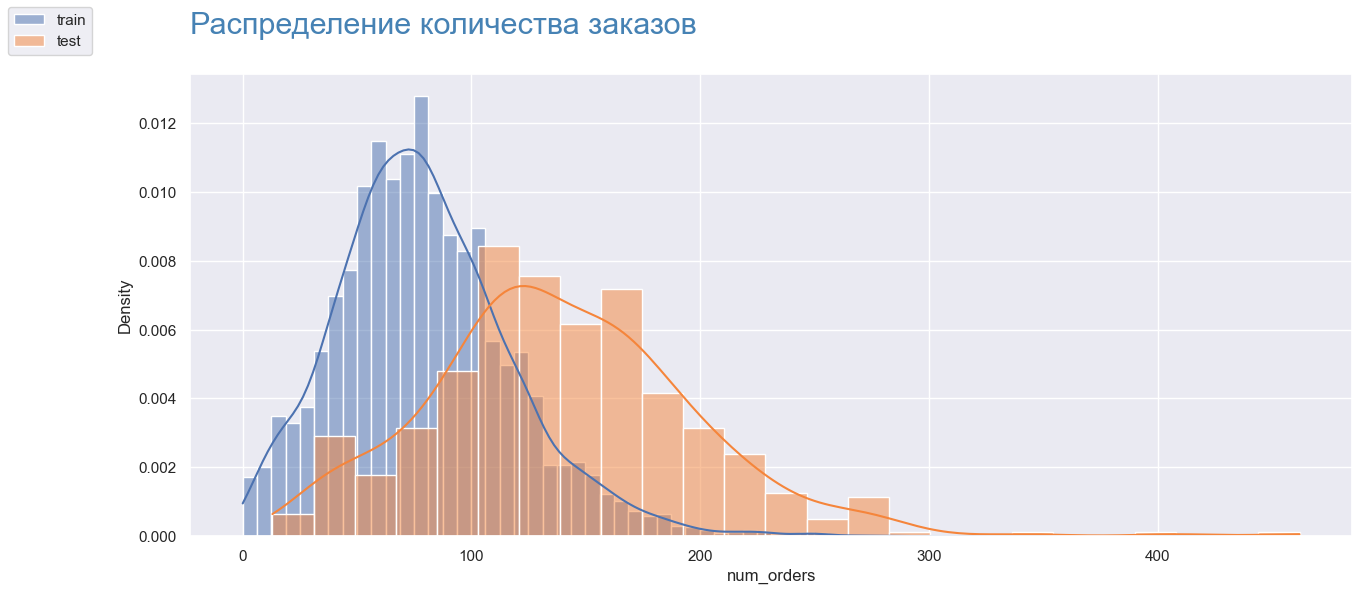

In [28]:
fig = plt.figure(figsize=(15,6))
sns.histplot(y_train, label='train', kde=True, stat="density")
sns.histplot(y_test, label='test', color='#f5853b', kde=True, stat="density")
fig.legend(loc='upper left')
plt.title('Распределение количества заказов' + "\n", loc="left", fontsize = 22, color = 'SteelBlue');

### Обучение моделей

Для предсказания результата будем использовать следующие модели:
- LinearRegression
- RandomForestRegressor
- LightGBM
- XGBoost
- CatBoost

Нам нужна модель со значением метрики RSME на тестовой выборке не более 48

In [29]:
# Определение метрики RMSE как scoring
scoring = make_scorer(mean_squared_error, squared=False)

In [30]:
models_rmse_scores = {
        'model': [],
        'time': [],
        'RMSE_train': [],
        'RMSE_test': []
    }

In [31]:
tscv = TimeSeriesSplit(n_splits=5)

#### LinearRegression

In [32]:
start_lr = datetime.now()

params = {
    'fit_intercept': [True, False]
}

search = RandomizedSearchCV(estimator=LinearRegression(), param_distributions=params,
                            cv=tscv, verbose=0, scoring=scoring, random_state=12345)
search.fit(X_train, y_train)

time_lr = datetime.now() - start_lr
print(time_lr)

C:\Users\user\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:307: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


0:00:00.272175


In [33]:
best_params_lr = search.best_params_
best_model_lr = search.best_estimator_
best_rmse_lr = round(search.best_score_, 2)

models_rmse_scores['model'].append('LinearRegression')
models_rmse_scores['time'].append(time_lr)
models_rmse_scores['RMSE_train'].append(best_rmse_lr)
models_rmse_scores['RMSE_test'].append('')

print('Подобранные параметры:')
pprint(best_params_lr)
print('RMSE по подобранным параметрам:', best_rmse_lr)
print('Время поиска параметров:', time_lr)

Подобранные параметры:
{'fit_intercept': True}
RMSE по подобранным параметрам: 22.54
Время поиска параметров: 0:00:00.272175


#### RandomForestRegressor

In [34]:
# Список гиперпараметров
params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt'],
    'random_state': [12345]    
}

In [35]:
start_rfr = datetime.now()

model_rfr = RandomForestRegressor(random_state=12345)
search = RandomizedSearchCV(estimator=model_rfr, param_distributions=params, 
                            cv=tscv, verbose=0, scoring=scoring, random_state=12345)
search.fit(X_train, y_train)

time_rfr = datetime.now() - start_rfr
print(time_rfr)

C:\Users\user\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
20 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\user\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\user\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\user\anaconda3\Lib\site-packages\sklea

0:01:24.125526


In [36]:
best_params_rfr = search.best_params_
best_model_rfr = search.best_estimator_
best_rmse_rfr = round(search.best_score_, 2)

models_rmse_scores['model'].append('RandomForestRegressor')
models_rmse_scores['time'].append(time_rfr)
models_rmse_scores['RMSE_train'].append(best_rmse_rfr)
models_rmse_scores['RMSE_test'].append('')

print('Подобранные параметры:')
pprint(best_params_rfr)
print('RMSE по подобранным параметрам:', best_rmse_rfr)
print('Время поиска параметров:', time_rfr)

Подобранные параметры:
{'max_depth': 5,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'n_estimators': 300,
 'random_state': 12345}
RMSE по подобранным параметрам: 26.13
Время поиска параметров: 0:01:24.125526


#### LightGBM

In [37]:
# Список гиперпараметров
params = {
    'objective': 'regression',
    'metric': 'rmse',
    'boosting_type': 'gbdt',
    'num_leaves': [31, 100],
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 0,
    'random_state': 12345
}
params = {
    'num_leaves': [10, 20, 40],
    'max_depth': [None, 10, 30],
    'learning_rate': [0.01, 0.1, 1],
    'n_estimators': [100, 200, 300],
    'random_state': [12345]
}

In [38]:
start_lgb = datetime.now()

model_lgb = LGBMRegressor(random_state=12345)
search = RandomizedSearchCV(estimator=model_lgb, param_distributions=params, 
                            cv=tscv, verbose=0, scoring=scoring, random_state=12345)
search.fit(X_train, y_train)

time_lgb = datetime.now() - start_lgb
print(time_lgb)

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001432 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 17068
[LightGBM] [Info] Number of data points in the train set: 636, number of used features: 171
[LightGBM] [Info] Start training from score 57.938679
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001913 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 21673
[LightGBM] [Info] Number of data points in the train set: 1270, number of used features: 171
[LightGBM] [Info] Start training from score 61.134646
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002036 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 24220
[LightGBM] [Info] Number of data points in the train set: 1904, number of used features: 171
[LightGBM] [In

In [39]:
best_params_lgb = search.best_params_
best_model_lgb = search.best_estimator_
best_rmse_lgb = round(search.best_score_, 2)

models_rmse_scores['model'].append('LGBMRegressor')
models_rmse_scores['time'].append(time_lgb)
models_rmse_scores['RMSE_train'].append(best_rmse_lgb)
models_rmse_scores['RMSE_test'].append('')

print('Подобранные параметры:')
pprint(best_params_lgb)
print('RMSE по подобранным параметрам:', best_rmse_lgb)
print('Время поиска параметров:', time_lgb)

Подобранные параметры:
{'learning_rate': 1,
 'max_depth': 10,
 'n_estimators': 300,
 'num_leaves': 10,
 'random_state': 12345}
RMSE по подобранным параметрам: 31.93
Время поиска параметров: 0:00:06.679059


#### XGBoost

In [40]:
# Список гиперпараметровв
params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.5, 1],
    'gamma': [0, 0.1, 0.2],
    'colsample_bytree': [0.5, 0.7, 1],
    'random_state': [12345]
}

In [41]:
start_xgb = datetime.now()

model_xgb = XGBRegressor(random_state=12345)
search = RandomizedSearchCV(estimator=model_xgb, param_distributions=params, 
                            cv=tscv, verbose=0, scoring=scoring, random_state=12345)
search.fit(X_train, y_train)

time_xgb = datetime.now() - start_xgb
print(time_xgb)

0:00:18.567194


In [42]:
best_params_xgb = search.best_params_
best_model_xgb = search.best_estimator_
best_rmse_xgb = round(search.best_score_, 2)

models_rmse_scores['model'].append('XGBRegressor')
models_rmse_scores['time'].append(time_xgb)
models_rmse_scores['RMSE_train'].append(best_rmse_xgb)
models_rmse_scores['RMSE_test'].append('')

print('Подобранные параметры:')
pprint(best_params_xgb)
print('RMSE по подобранным параметрам:', best_rmse_xgb)
print('Время поиска параметров:', time_xgb)

Подобранные параметры:
{'colsample_bytree': 0.7,
 'gamma': 0.2,
 'learning_rate': 1,
 'max_depth': 7,
 'n_estimators': 300,
 'random_state': 12345}
RMSE по подобранным параметрам: 34.87
Время поиска параметров: 0:00:18.567194


#### CatBoost

In [43]:
# Список гиперпараметров
params = {
    'iterations': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'depth': [4, 6, 8],
    'l2_leaf_reg': [1, 3, 5],
    'border_count': [32, 64, 128],
    'random_state': [12345]
}

In [44]:
start_cbr = datetime.now()

model_cbr = CatBoostRegressor(random_state=12345)
search = RandomizedSearchCV(estimator=model_cbr, param_distributions=params, 
                            cv=tscv, verbose=0, scoring=scoring, random_state=12345)
search.fit(X_train, y_train)

time_cbr = datetime.now() - start_cbr
print(time_cbr)

0:	learn: 29.4258240	total: 150ms	remaining: 29.9s
1:	learn: 29.3199904	total: 158ms	remaining: 15.7s
2:	learn: 29.2157467	total: 165ms	remaining: 10.8s
3:	learn: 29.0885995	total: 174ms	remaining: 8.54s
4:	learn: 28.9645759	total: 183ms	remaining: 7.13s
5:	learn: 28.8504635	total: 187ms	remaining: 6.03s
6:	learn: 28.7438305	total: 190ms	remaining: 5.24s
7:	learn: 28.6246993	total: 193ms	remaining: 4.64s
8:	learn: 28.5103147	total: 196ms	remaining: 4.17s
9:	learn: 28.3917727	total: 200ms	remaining: 3.79s
10:	learn: 28.2777327	total: 203ms	remaining: 3.48s
11:	learn: 28.1683385	total: 206ms	remaining: 3.23s
12:	learn: 28.0475860	total: 209ms	remaining: 3.01s
13:	learn: 27.9225771	total: 212ms	remaining: 2.82s
14:	learn: 27.8077307	total: 215ms	remaining: 2.65s
15:	learn: 27.6992178	total: 217ms	remaining: 2.49s
16:	learn: 27.5945691	total: 220ms	remaining: 2.36s
17:	learn: 27.4890388	total: 222ms	remaining: 2.25s
18:	learn: 27.3797545	total: 225ms	remaining: 2.14s
19:	learn: 27.2715651	

In [45]:
best_params_cbr = search.best_params_
best_model_cbr = search.best_estimator_
best_rmse_cbr = round(search.best_score_, 2)

models_rmse_scores['model'].append('CatBoostRegressor')
models_rmse_scores['time'].append(time_cbr)
models_rmse_scores['RMSE_train'].append(best_rmse_cbr)
models_rmse_scores['RMSE_test'].append('')

print('Подобранные параметры:')
pprint(best_params_cbr)
print('RMSE по подобранным параметрам:', best_rmse_cbr)
print('Время поиска параметров:', time_cbr)

Подобранные параметры:
{'border_count': 128,
 'depth': 4,
 'iterations': 100,
 'l2_leaf_reg': 5,
 'learning_rate': 0.01,
 'random_state': 12345}
RMSE по подобранным параметрам: 29.61
Время поиска параметров: 0:00:38.210144


In [46]:
analise_df = pd.DataFrame(
    models_rmse_scores
                         ).set_index('model')

In [47]:
analise_df['train_coef'] = (analise_df['time']/max(analise_df['time']) + analise_df['RMSE_train']/max(analise_df['RMSE_train'])) / 2

In [48]:
analise_df

,time,RMSE_train,RMSE_test,train_coef
model,,,,
LinearRegression,0 days 00:00:00.272175,22.54,,0.324818
RandomForestRegressor,0 days 00:01:24.125526,26.13,,0.874677
LGBMRegressor,0 days 00:00:06.679059,31.93,,0.497540
XGBRegressor,0 days 00:00:18.567194,34.87,,0.610354
CatBoostRegressor,0 days 00:00:38.210144,29.61,,0.651679


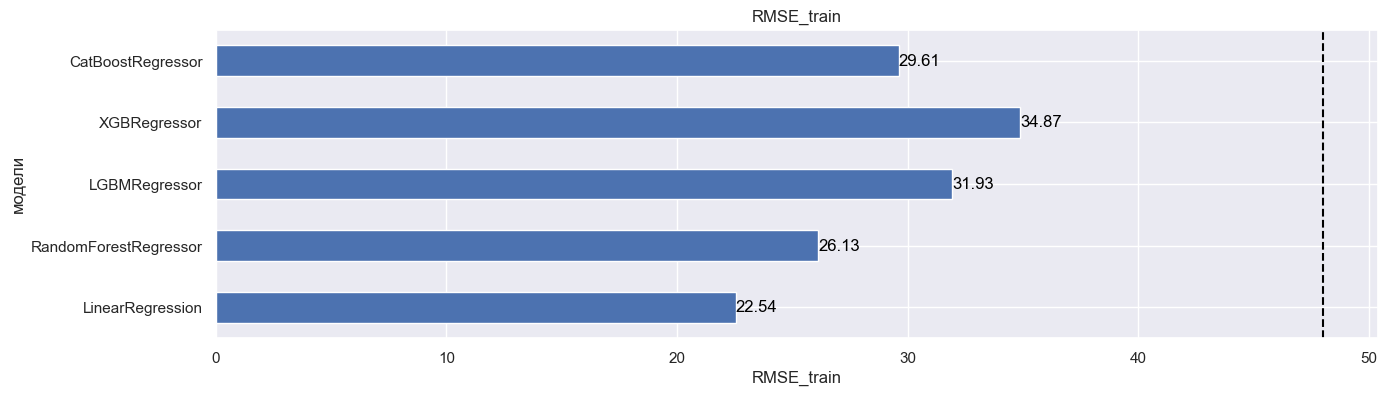

In [49]:
ax = analise_df['RMSE_train'].plot.barh(figsize=(15,4), legend=False, title='RMSE_train')
ax.axvline(x=48, color='black', linestyle='--')
ax.bar_label(ax.containers[0], color='black')
for bar in ax.containers[0]:
    if bar.get_width() > 48:
        bar.set_color('#F57C00')
ax.set_xlabel("RMSE_train")
ax.set_ylabel("модели");

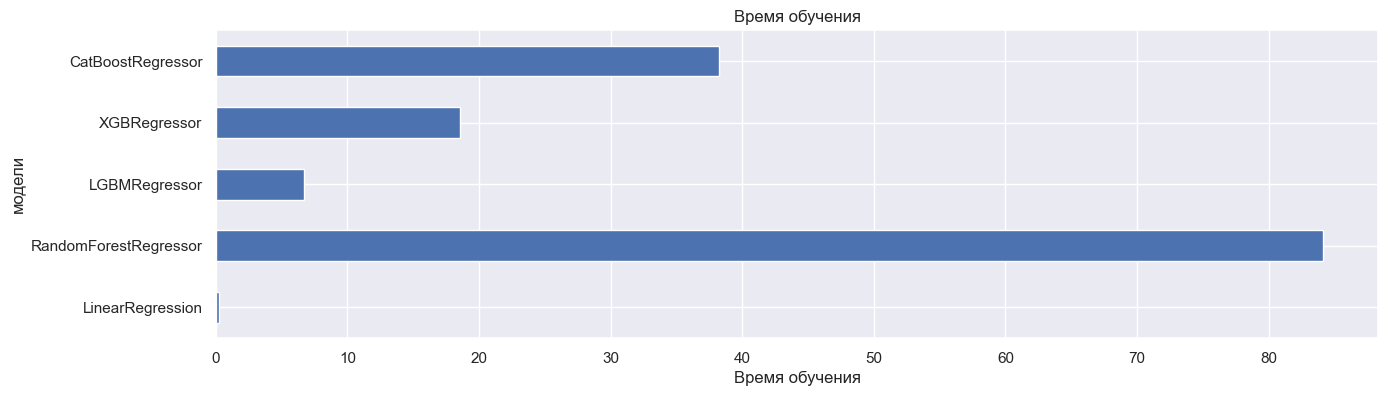

In [50]:
analise_df['time'] = analise_df['time'].dt.total_seconds()
ax = analise_df['time'].plot.barh(figsize=(15,4), legend=False, title='Время обучения')
ax.set_xlabel("Время обучения")
ax.set_ylabel("модели");

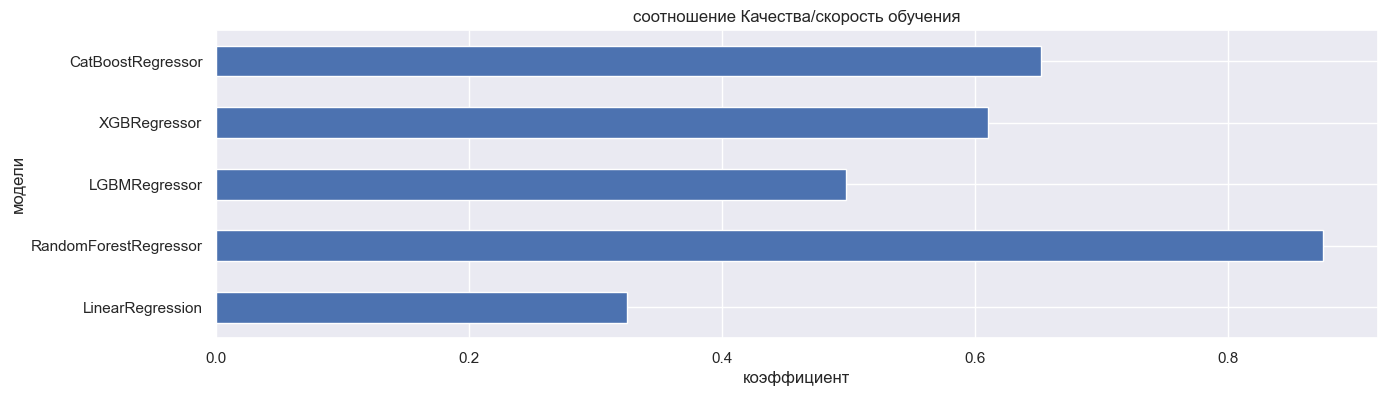

In [51]:
ax = analise_df['train_coef'].plot.barh(figsize=(15,4), legend=False, title='соотношение Качества/скорость обучения')
ax.set_xlabel("коэффициент")
ax.set_ylabel("модели");

По значению RMSE Линейная регрессия и случайный лес показали себя лучше всего, но учитывая время обучения, линейная регрессия выглядит лучше других.  
Обучим все модели и проверим их на тестовой выборке, опираясь на значения RMSE тесовой выборке выберем лучшую модель  

## Тестирование

Создадим модели, получим RSME на тестовой выборке, по этой метрике выберем нашу лучшую модель, которую представим заказчику

### Адекватность модели

In [52]:
pred_previous = y_test.shift()
pred_previous.iloc[0] = y_train.iloc[-1]
adequacy_test = round(mean_squared_error(y_test, pred_previous)**(0.5), 2)
print(f"Адекватность модели: {adequacy_test}\n")

Адекватность модели: 58.86



### LinearRegression

In [53]:
analise_df

,time,RMSE_train,RMSE_test,train_coef
model,,,,
LinearRegression,0.272175,22.54,,0.324818
RandomForestRegressor,84.125526,26.13,,0.874677
LGBMRegressor,6.679059,31.93,,0.497540
XGBRegressor,18.567194,34.87,,0.610354
CatBoostRegressor,38.210144,29.61,,0.651679


In [54]:
# Создаём модель по полученным параметрам
best_model_lr.fit(X_train, y_train)
y_pred = best_model_lr.predict(X_test)
rmse_lr = round(mean_squared_error(y_test, y_pred)**(0.5), 2)
analise_df.loc[['LinearRegression'],['RMSE_test']] = rmse_lr
print(f"RMSE test: {rmse_lr}\n")

RMSE test: 34.65



### RandomForestRegressor

In [55]:
# Создаём модель по полученным параметрам
best_model_rfr = RandomForestRegressor(**best_params_rfr)
best_model_rfr.fit(X_train, y_train)
y_pred = best_model_rfr.predict(X_test)
rmse_rfr = round(mean_squared_error(y_test, y_pred)**(0.5), 2)
analise_df.loc[['RandomForestRegressor'],['RMSE_test']] = rmse_rfr
print(f"RMSE test: {rmse_rfr}\n")

RMSE test: 44.86



### LGBMRegressor

In [56]:
# Создаём модель по полученным параметрам
best_model_lgb = LGBMRegressor(**best_params_lgb)
best_model_lgb.fit(X_train, y_train)
y_pred = best_model_lgb.predict(X_test)
rmse_lgb = round(mean_squared_error(y_test, y_pred)**(0.5), 2)
analise_df.loc[['LGBMRegressor'],['RMSE_test']] = rmse_lgb
print(f"RMSE test: {rmse_lgb}\n")

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003878 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 31477
[LightGBM] [Info] Number of data points in the train set: 3806, number of used features: 171
[LightGBM] [Info] Start training from score 79.352864
RMSE test: 50.49



### XGBRegressor

In [57]:
# Создаём модель по полученным параметрам
best_model_xgb = XGBRegressor(**best_params_xgb)
best_model_xgb.fit(X_train, y_train)
y_pred = best_model_xgb.predict(X_test)
rmse_xgb = round(mean_squared_error(y_test, y_pred)**(0.5), 2)
analise_df.loc[['XGBRegressor'],['RMSE_test']] = rmse_xgb
print(f"RMSE test: {rmse_xgb}\n")

RMSE test: 58.96



### CatBoostRegressor

In [58]:
# Создаём модель по полученным параметрам
best_model_cbr = CatBoostRegressor(**best_params_cbr)
best_model_cbr.fit(X_train, y_train)
y_pred = best_model_cbr.predict(X_test)
rmse_cbr = round(mean_squared_error(y_test, y_pred)**(0.5), 2)
analise_df.loc[['CatBoostRegressor'],['RMSE_test']] = rmse_cbr
print(f"RMSE test: {rmse_cbr}\n")

0:	learn: 38.4655909	total: 2.04ms	remaining: 202ms
1:	learn: 38.2779005	total: 3.86ms	remaining: 189ms
2:	learn: 38.0736489	total: 5.47ms	remaining: 177ms
3:	learn: 37.8820249	total: 7.08ms	remaining: 170ms
4:	learn: 37.6923541	total: 8.82ms	remaining: 168ms
5:	learn: 37.4970858	total: 10.5ms	remaining: 165ms
6:	learn: 37.3012290	total: 12.1ms	remaining: 161ms
7:	learn: 37.1040964	total: 13.7ms	remaining: 157ms
8:	learn: 36.9228879	total: 15.2ms	remaining: 153ms
9:	learn: 36.7271337	total: 16.6ms	remaining: 150ms
10:	learn: 36.5462234	total: 18.2ms	remaining: 147ms
11:	learn: 36.3739168	total: 19.6ms	remaining: 144ms
12:	learn: 36.2050931	total: 21ms	remaining: 140ms
13:	learn: 36.0308517	total: 22.3ms	remaining: 137ms
14:	learn: 35.8426366	total: 23.7ms	remaining: 134ms
15:	learn: 35.6610486	total: 25ms	remaining: 131ms
16:	learn: 35.4912924	total: 26.4ms	remaining: 129ms
17:	learn: 35.3221926	total: 27.8ms	remaining: 126ms
18:	learn: 35.1590524	total: 29.1ms	remaining: 124ms
19:	lea

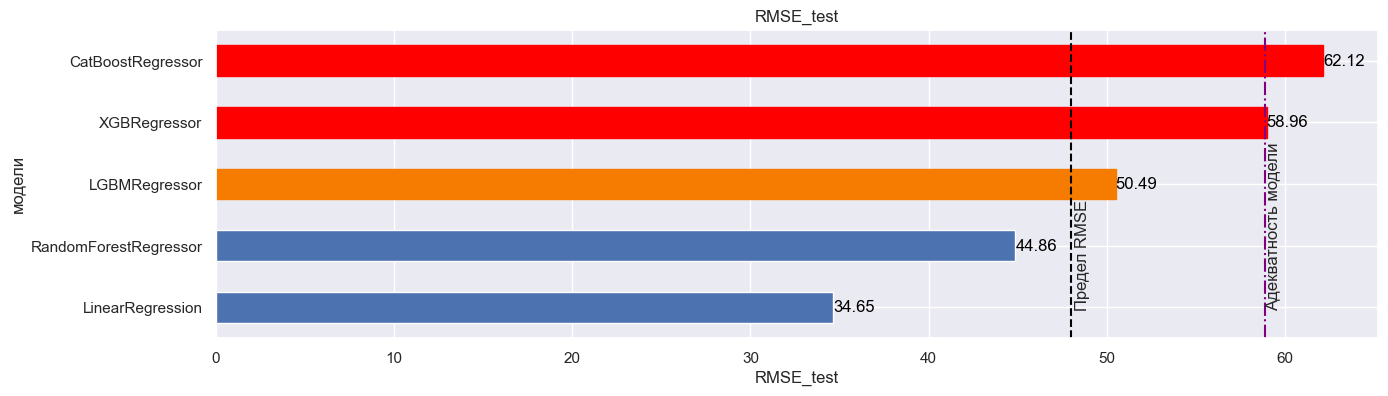

In [59]:
ax = analise_df['RMSE_test'].plot.barh(figsize=(15,4), legend=False, title='RMSE_test')
ax.axvline(x=48, color='black', linestyle='--')
ax.axvline(x=adequacy_test, color='purple', linestyle='-.')
ax.text(48.2, 0,'Предел RMSE', rotation=90)
ax.text(adequacy_test, 0,'Адекватность модели', rotation=90)
ax.bar_label(ax.containers[0], color='black')
for bar in ax.containers[0]:
    if bar.get_width() > 48:
        bar.set_color('#F57C00')
    if bar.get_width() > adequacy_test:
        bar.set_color('red')
ax.set_xlabel("RMSE_test")
ax.set_ylabel("модели");

In [60]:
print(f"Список моделей, удовлетворяющим критерию качества:\n{analise_df[analise_df['RMSE_test'] <= 48].index.tolist()}")

Список моделей, удовлетворяющим критерию качества:
['LinearRegression', 'RandomForestRegressor']


In [61]:
print(f"Список моделей, прошедших проверку на адекватность:\n{analise_df[analise_df['RMSE_test'] <= adequacy_test].index.tolist()}")

Список моделей, прошедших проверку на адекватность:
['LinearRegression', 'RandomForestRegressor', 'LGBMRegressor']


Как и на обучающей выборке, так и на тестовой выборке модель LinearRegression показала лучший результат

## Общий вывод

**Входные данные**
- Было два столбце время и количество ордеров. Ресемплировали по одному часы 
- Создали дополнительные признаки
- Целевой признак - "num_orders"


**Модели**  
- Были взяты 5 моделей: LightGBM, XGBoost, LinearRegression, RandomForestRegressor, CatBoost  
- По критерию качества с заранее выбранными параметрами прошли две модели: LinearRegression и RandomForestRegressor  


**Лучшая модель**
Критерий качества модели **LinearRegression** ~ 35 при времени обучения ~ 01.76 секунд